<a href="https://colab.research.google.com/github/tnakagawa/ipynb/blob/master/Elliptic_Curve_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 楕円曲線暗号（Elliptic Curve Cryptography）

ここでは、楕円曲線の理論（加算、２倍算、スカラー倍算）を実装します。


## 楕円曲線（Elliptic Curve）

楕円曲線は次の数式で表されます。

$$
y^2 = x^3 + ax + b
$$



例：$a=-3,b=3$とした時の曲線をグラフにしてみます。

式の左辺が$y^2$なので、X軸に対して線対称となっていることがわかります。

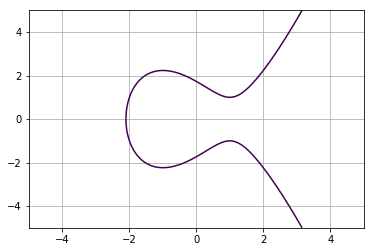

In [2]:
#@title 楕円曲線グラフ（実数）
import numpy as np
import matplotlib.pyplot as pl

a = -3
b = 3

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

pl.grid()
pl.show()

## 点の加算

楕円曲線上の点に対して、加算を定義します。

点を$P,Q,R$とした時、$P+Q=R$を次のように定義します。

点$P$と点$Q$の2点を通る直線が曲線と交わる点を$X$軸に対して線対称としたものを点$R$とします。

グラフにしてみます。

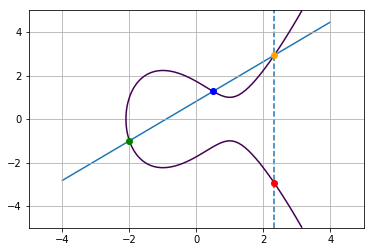

In [3]:
#@title 点の加算（楕円曲線グラフ）
a = -3
b = 3

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

# 点P
px = -2.0
py = -np.sqrt(px**3 + a*px + b)
pl.plot(px, py, 'o', color='green')

# 点Q
qx = 0.5
qy = np.sqrt(qx**3 + a*qx + b)
pl.plot(qx, qy, 'o', color='blue')

# 点Pと点Qを通る直線 m*x+n
m = (qy-py)/(qx-px)
n = py - m*px
lx = np.arange(-4, 5)
ly = m*lx + n
pl.plot(lx, ly, zorder=0)

# 点-R
poly = np.poly1d([-1, m**2, 2*m*n-a, n**2-b])
rx = max(np.roots(poly))
ry = np.sqrt(rx**3 + a*rx + b)
pl.plot(rx, ry, 'o', color='orange')

# 点R
pl.plot(rx, -ry, 'o', color='red')

pl.axvline(rx, linestyle='dashed', zorder=0)

pl.grid()
pl.show()

緑色が点$P$、青色が点$Q$、赤色が点$R$となります。

# 参考文献 (References)

*   [楕円曲線暗号 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%A5%95%E5%86%86%E6%9B%B2%E7%B7%9A%E6%9A%97%E5%8F%B7)
*   [楕円曲線 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%A5%95%E5%86%86%E6%9B%B2%E7%B7%9A)

